# Assignment: 2 - QFT
### Name: Lilith Bertens
### Hva ID: Bertenl

# Exercise 1
Make a generic qft.

### Answer
See the code below for the implementation.

     ┌───┐┌───┐                                                        »
q_0: ┤ X ├┤ H ├─■────────■─────────────■─────────────────■─────────────»
     └───┘└───┘ │P(π/2)  │       ┌───┐ │                 │             »
q_1: ───────────■────────┼───────┤ H ├─┼────────■────────┼─────────────»
                         │P(π/4) └───┘ │        │P(π/2)  │        ┌───┐»
q_2: ────────────────────■─────────────┼────────■────────┼────────┤ H ├»
                                       │P(π/8)           │        └───┘»
q_3: ──────────────────────────────────■─────────────────┼─────────────»
                                                         │P(π/16)      »
q_4: ────────────────────────────────────────────────────■─────────────»
                                                                       »
q_5: ──────────────────────────────────────────────────────────────────»
                                                                       »
q_6: ──────────────────────────────────────────────

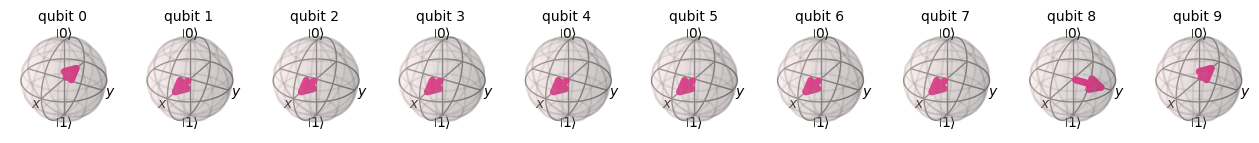

In [14]:
import qiskit
from qiskit.visualization import plot_bloch_multivector
import math

QbitNum = 10
QC = qiskit.QuantumCircuit(QbitNum)
QC.x(0)
QC.x(QbitNum-1)#this is just to show that it does something. not part of the qft
#qft:
QC.h(0)
for i in range(QbitNum-1): #runs for the amount of qbits - 1
    QC.cp(math.pi/math.pow(2, i+1), 0, i+1) #starts at qbit 1 instead of 0
for i in range(QbitNum-2): #runs for the amount of qbits - 1
    QC.h(i+1)
    QC.cp(math.pi/2, i+1, i+2)
QC.h(QbitNum-1)
print(QC)
plot_bloch_multivector(qiskit.quantum_info.Statevector(QC))

# Exercise 2
Make a generic inverse qft.

### Answer
See the code below for the implementation.

     ┌───┐                                                            ┌───┐
q_0: ┤ X ├────────────────────■──────────────────────■────────■───────┤ H ├
     └───┘                    │                ┌───┐ │        │P(π/2) └───┘
q_1: ─────────────────────────┼────────■───────┤ H ├─┼────────■────────────
                        ┌───┐ │        │P(π/2) └───┘ │P(π/4)               
q_2: ───────────■───────┤ H ├─┼────────■─────────────■─────────────────────
     ┌───┐┌───┐ │P(π/2) └───┘ │P(π/8)                                      
q_3: ┤ X ├┤ H ├─■─────────────■────────────────────────────────────────────
     └───┘└───┘                                                            


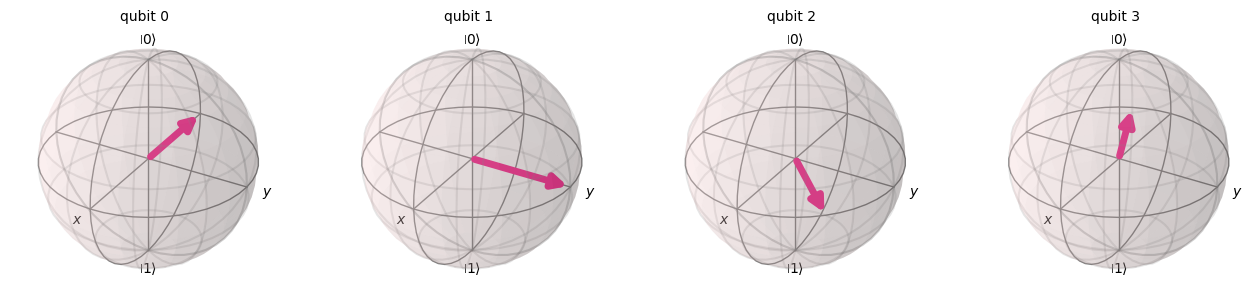

In [17]:
import qiskit
from qiskit.visualization import plot_bloch_multivector
import math

QbitNum = 4
QC = qiskit.QuantumCircuit(QbitNum)
QC.x(0)
QC.x(QbitNum-1)#this is just to show that it does something. not part of the qft
#inverse qft:
QC.h(QbitNum-1)
for i in reversed(range(QbitNum-2)): #runs for the amount of qbits - 1
    QC.cp(math.pi/2, i+1, i+2)
    QC.h(i+1)
for i in reversed(range(QbitNum-1)): #runs for the amount of qbits - 1
    QC.cp(math.pi/math.pow(2, i+1), 0, i+1) #starts at qbit 1 instead of 0
QC.h(0)
print(QC)
plot_bloch_multivector(qiskit.quantum_info.Statevector(QC))

# Exercise 2
Implement a function which brings qbits into superposition.

### Answer
As it is not specified what superposition, I will assume a maximally entangled one.
I will also make it generic so that it works for n qbits.

In [18]:
import qiskit
import math

QbitNum = 10
QC = qiskit.QuantumCircuit(QbitNum)
QC.h(0)
for i in range(QbitNum-1):
    QC.cx(0,i+1)
print(QC)
print(qiskit.quantum_info.Statevector(QC))

     ┌───┐                                             
q_0: ┤ H ├──■────■────■────■────■────■────■────■────■──
     └───┘┌─┴─┐  │    │    │    │    │    │    │    │  
q_1: ─────┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼──
          └───┘┌─┴─┐  │    │    │    │    │    │    │  
q_2: ──────────┤ X ├──┼────┼────┼────┼────┼────┼────┼──
               └───┘┌─┴─┐  │    │    │    │    │    │  
q_3: ───────────────┤ X ├──┼────┼────┼────┼────┼────┼──
                    └───┘┌─┴─┐  │    │    │    │    │  
q_4: ────────────────────┤ X ├──┼────┼────┼────┼────┼──
                         └───┘┌─┴─┐  │    │    │    │  
q_5: ─────────────────────────┤ X ├──┼────┼────┼────┼──
                              └───┘┌─┴─┐  │    │    │  
q_6: ──────────────────────────────┤ X ├──┼────┼────┼──
                                   └───┘┌─┴─┐  │    │  
q_7: ───────────────────────────────────┤ X ├──┼────┼──
                                        └───┘┌─┴─┐  │  
q_8: ────────────────────────────────────────┤ X